# SI221 Practical assignement 2 
## k-Nearest Neighbors 

### 1- k-NN classification: Synthetic dataset

---
#### Question 1



In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random, math
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

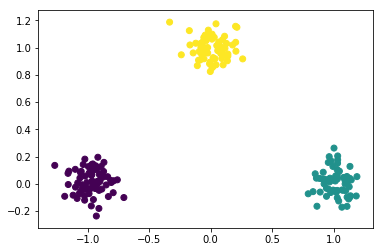

In [2]:
def generate_dataset(sigma):
  x,y = make_blobs(n_samples=300, centers=[[-1,0],[1,0],[0,1]], cluster_std=sigma)

  '''
  x_train = x[:200]
  x_test = x[200:]
  y_train = y[:200]
  y_test = y[200:]
  '''
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

  return X_train,y_train, X_test,y_test

X_train,y_train,X_test,y_test = generate_dataset(0.10)
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)


In [3]:
def distance(x1,x2):
  a = x1[0] - x2[0] 
  b = x1[1] - x2[1]
  return np.sqrt(a**2 + b**2)

In [4]:
def sort_distance(x,X_train):
  dist = []
  for i in range(len(X_train)) :
    dist.append([i,distance(x,X_train[i])])
  # Tri 
  for i in range(1, len(dist)): 
        k = dist[i] 
        j = i-1
        while j >= 0 and k[1] < dist[j][1] : 
                dist[j + 1] = dist[j] 
                j -= 1
        dist[j + 1] = k
  return dist


In [5]:
def kNN(X_train,labels,x,k):
  dist = sort_distance(x,X_train)[:k]
  ret = [0,0,0]

  for i in range(k):
    ri = dist[i][0]
    y_i = labels[ri]
    ret[y_i] += 1

    '''
    label = 0 
    for i in range(1,3):
      if ret[i] > ret[label] :
        label = i
    '''
    
    label = np.argmax(ret)
  
  return label

print(kNN(X_train,y_train,X_test[50],5))

2


In [6]:
def predict(X_train, X_test, y_train, y_test, k):
  y_predict = np.zeros(len(X_test), dtype=int)
  error = 0
  for i in range(len(X_test)):
    y_predict[i] = kNN(X_train, y_train, X_test[i], k)
    if(y_predict[i] != y_test[i]):
      error += 1
  return error/len(X_test)

In [7]:
def predict_some_K(X_train, X_test, y_train, y_test, K):
  errors = np.zeros(len(K), dtype=int)
  for k in range(len(K)):
    errors[k] = predict(X_train, X_test,y_train,y_test,K[k])
  return errors

K = [1,2,5,10]
print(predict_some_K(X_train, X_test, y_train, y_test, K))



[0 0 0 0]


#### Question 2

In [8]:
def run_N_dataset(N,sig,k):
  err = []
  for i in range(N):
    X_train,y_train,X_test,y_test = generate_dataset(sig)
    err.append(predict(X_train, X_test, y_train, y_test, k))
  err = np.array(err)
  return err.mean(), err.std()

K = 5
print(run_N_dataset(50,0.05,K))

(0.0, 0.0)


[0.     0.005  0.0458 0.1632] [0.         0.0067082  0.01980808 0.03466641]


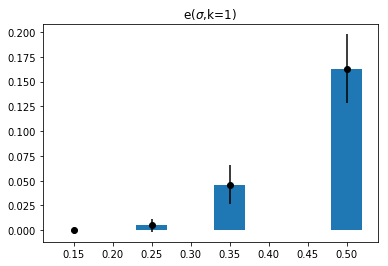

[0.     0.005  0.0476 0.1486] [0.         0.00781025 0.02445895 0.04039851]


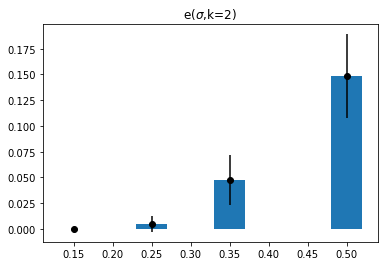

[0.     0.0042 0.0292 0.1122] [0.         0.00723602 0.01467515 0.03471541]


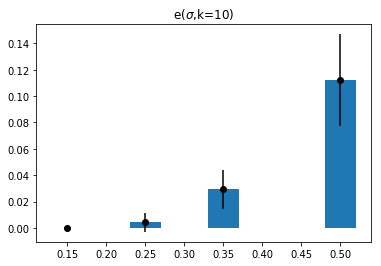

In [9]:
#with fixed k and differents sigma
def run_N_dataset_sigmas(N,sigmas,k):
  err = np.zeros(len(sigmas))
  dev = np.zeros(len(sigmas))
  for sig in range(len(sigmas)):
    err[sig], dev[sig] = run_N_dataset(N,sigmas[sig],k)
  return err,dev

sigmas = [0.15,0.25,0.35,0.5]
K = [1,2,10]
for k in K:
  err, s = run_N_dataset_sigmas(50,sigmas,k)
  print(err,s)
  plt.bar(sigmas,err, width=0.04, align='center')
  plt.errorbar(sigmas,err,yerr=s, color='black', fmt='o')
  plt.title("e($\sigma$,k="+str(k)+") ")
  plt.savefig("q1.png")
  plt.show(block=False)

[0.0004 0.0006 0.     0.0004 0.0002 0.    ] [0.00195959 0.00237487 0.         0.00195959 0.0014     0.        ]


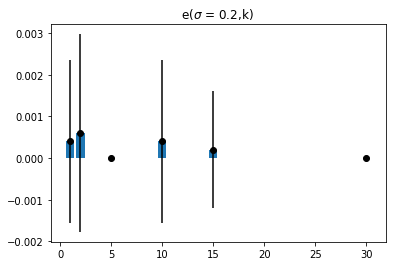

[0.0792 0.0846 0.0628 0.058  0.0618 0.0524] [0.02544327 0.02899724 0.02600308 0.02457641 0.0246325  0.02437704]


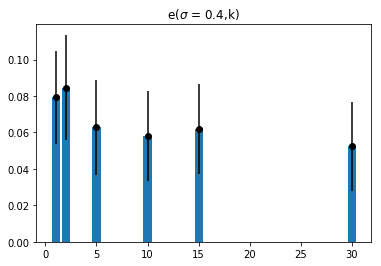

[0.1582 0.156  0.1176 0.1224 0.1072 0.1216] [0.05148553 0.04529901 0.02963511 0.02874439 0.02646054 0.03048672]


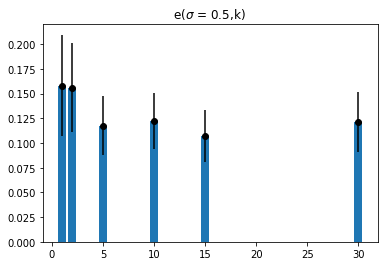

[0.2424 0.2362 0.1946 0.177  0.1776 0.1758] [0.05030149 0.04122572 0.03471081 0.0399124  0.03717849 0.03418128]


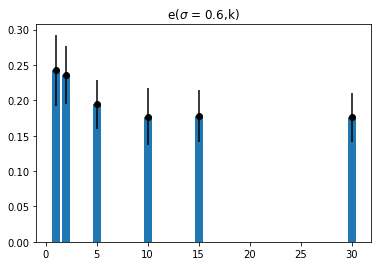

In [10]:
#with fixed sigma and differents k
def run_N_dataset_K(N,sig,K):
  err = np.zeros(len(K))
  dev = np.zeros(len(K))
  for k in range(len(K)):
    err[k], dev[k] = run_N_dataset(N,sig,K[k])
  return err,dev

sigmas = [0.2,0.4,0.5,0.6]
K = [1,2,5,10,15,30]
for sig in sigmas:
  err, s = run_N_dataset_K(50,sig,K)
  print(err,s)
  plt.bar(K,err, width=0.8, align='center')
  plt.errorbar(K,err,yerr=s, color='black', fmt='o')
  plt.title("e($\sigma$ = "+str(sig)+",k) ")
  plt.savefig("q1.png")
  plt.show(block=False)

### 2- k-NN regression: Szeged-weather dataset

---



In [37]:
import pandas as pd

df=pd.read_csv('weatherHistory.csv', index_col=0)
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [46]:
temperature = np.array(df["Temperature (C)"])
humidity = np.array(df["Humidity"])
apparent_temp = np.array(df["Apparent Temperature (C)"])

print(len(temperature))
print(len(humidity))
print(apparent_temp)

96453
96453
[ 7.38888889  7.22777778  9.37777778 ... 22.03888889 21.52222222
 20.43888889]


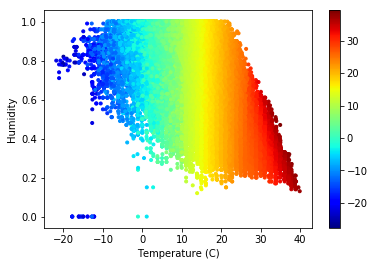

In [53]:
plt.scatter(temperature,humidity,c=apparent_temp,marker=".",cmap="jet")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.colorbar()
plt.show(block= False)

In [ ]:
n=len(temperature)
plt.figure(figsize=(15,7))
for i in range(n):
    x,y=X[i],Y[i]
    color=Color[i]
    if color<-10:
        c='b'
    if color>-10 and color <0:
        c='g'
    elif color>0 and color <10:
        c='y'
    elif color>10 and color>20:
        c='orange'
    elif color>20 and color<30:
        c='r'
    plt.plot([x],[y],color=c,marker='o')
    
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.show()

### 3- k-NN classification: MNIST dataset

---

